In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy

In [72]:
df = pd.read_csv('top5000_animes.csv')
df

,Unnamed: 0,Rank,Title,Type,Type_count,Date_start,Date_end,Members,Score
0,0,1,Sousou no Frieren,TV,28,01.09.2023,01.03.2024,559365,"9,15"
1,1,2,Fullmetal Alchemist: Brotherhood,TV,64,01.04.2009,01.07.2010,3310604,"9,09"
2,2,3,Steins;Gate,TV,24,01.04.2011,01.09.2011,2538867,"9,07"
3,3,4,Gintama°,TV,51,01.04.2015,01.03.2016,624122,"9,06"
4,4,5,Shingeki no Kyojin Season 3 Part 2,TV,10,01.04.2019,01.07.2019,2244438,"9,05"
...,...,...,...,...,...,...,...,...,...
4995,4995,4996,I''s Pure,OVA,6,01.12.2005,01.06.2006,26817,"6,82"
4996,4996,4997,IS: Infinite Stratos Encore - Koi ni Kogareru ...,OVA,1,01.12.2011,01.12.2011,122701,"6,82"
4997,4997,4998,Aishen Qiaokeli-ing...,ONA,15,01.12.2015,01.03.2016,89710,"6,81"
4998,4998,4999,Aishite Knight,TV,42,01.03.1983,01.01.1984,8763,"6,81"


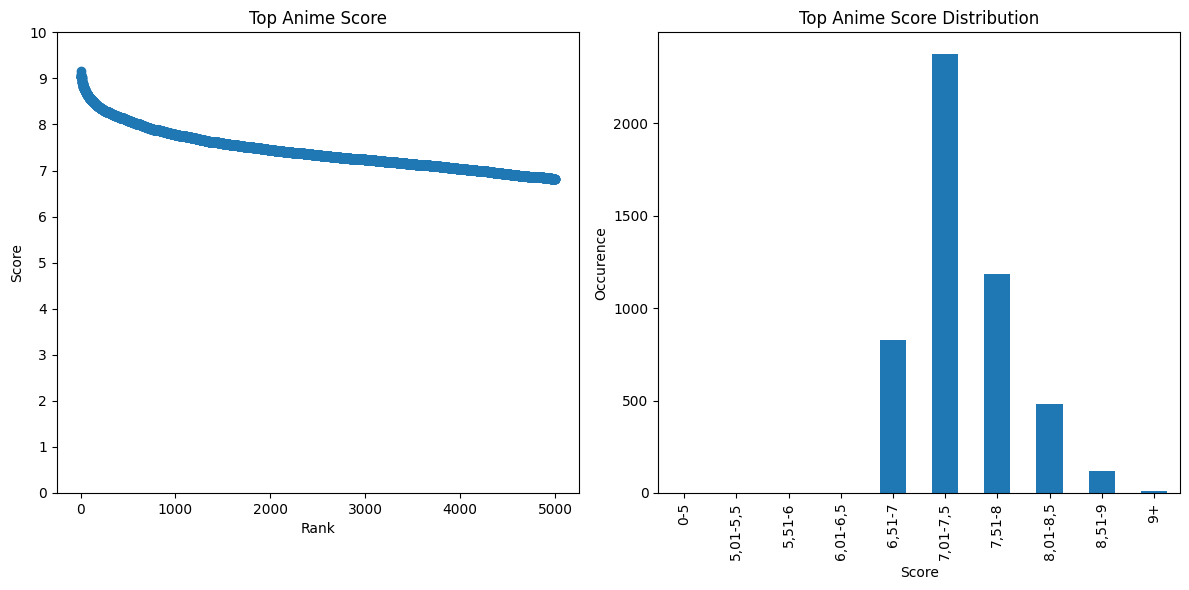

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(df['Rank'],df['Score'].str.replace(',','.').astype(float))
axs[0].set_title('Top Anime Score')
axs[0].set_xlabel('Rank')
axs[0].set_ylabel('Score')
axs[0].set_yticks(range(0,11,1))

bins = [0,5,5.5,6,6.5,7,7.5,8,8.5,9,float('inf')]
labels = ["0-5","5,01-5,5","5,51-6","6,01-6,5","6,51-7","7,01-7,5","7,51-8","8,01-8,5","8,51-9","9+"]

flat_series = df['Score'].str.replace(',','.').astype(float).values.flatten()

numerical_series = pd.to_numeric(pd.Series(flat_series), errors='coerce')
numerical_series = numerical_series.dropna()

binned_series = pd.cut(numerical_series,bins=bins,labels=labels)

occurrences = binned_series.value_counts().sort_index()

occurrences.plot(kind='bar', ax=axs[1])

axs[1].set_title('Top Anime Score Distribution')
axs[1].set_xlabel('Score')
axs[1].set_ylabel('Occurence')

plt.tight_layout()

plt.show()

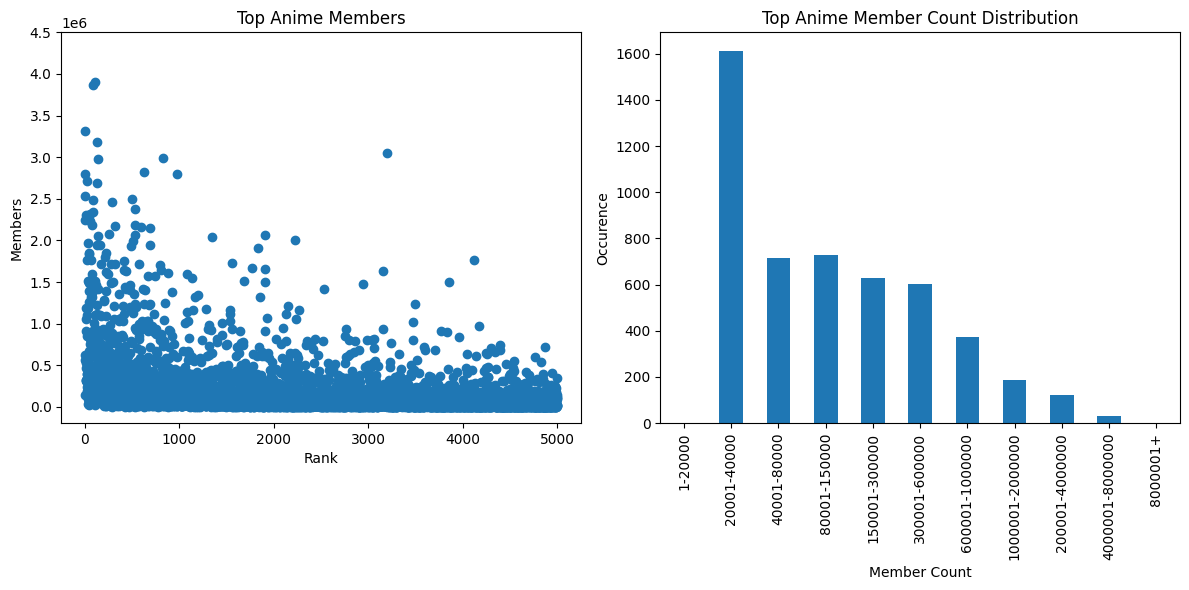

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(df['Rank'],df['Members'])
axs[0].set_title('Top Anime Members')
axs[0].set_xlabel('Rank')
axs[0].set_ylabel('Members')
axs[0].set_yticks(range(0,5000000,500000))

bins = [0,1,20000,40000,80000,150000,300000,600000,1000000,2000000,4000000,8000000]
labels = ['1-20000','20001-40000','40001-80000','80001-150000','150001-300000','300001-600000','600001-1000000','1000001-2000000','200001-4000000','4000001-8000000','8000001+']

flat_series = df['Members'].values.flatten()

numerical_series = pd.to_numeric(pd.Series(flat_series), errors='coerce')
numerical_series = numerical_series.dropna()
binned_series = pd.cut(numerical_series,bins=bins,labels=labels)

occurrences = binned_series.value_counts().sort_index()
occurrences.plot(kind='bar', ax=axs[1])

axs[1].set_title('Top Anime Member Count Distribution')
axs[1].set_xlabel('Member Count')
axs[1].set_ylabel('Occurence')

plt.tight_layout()

plt.show()

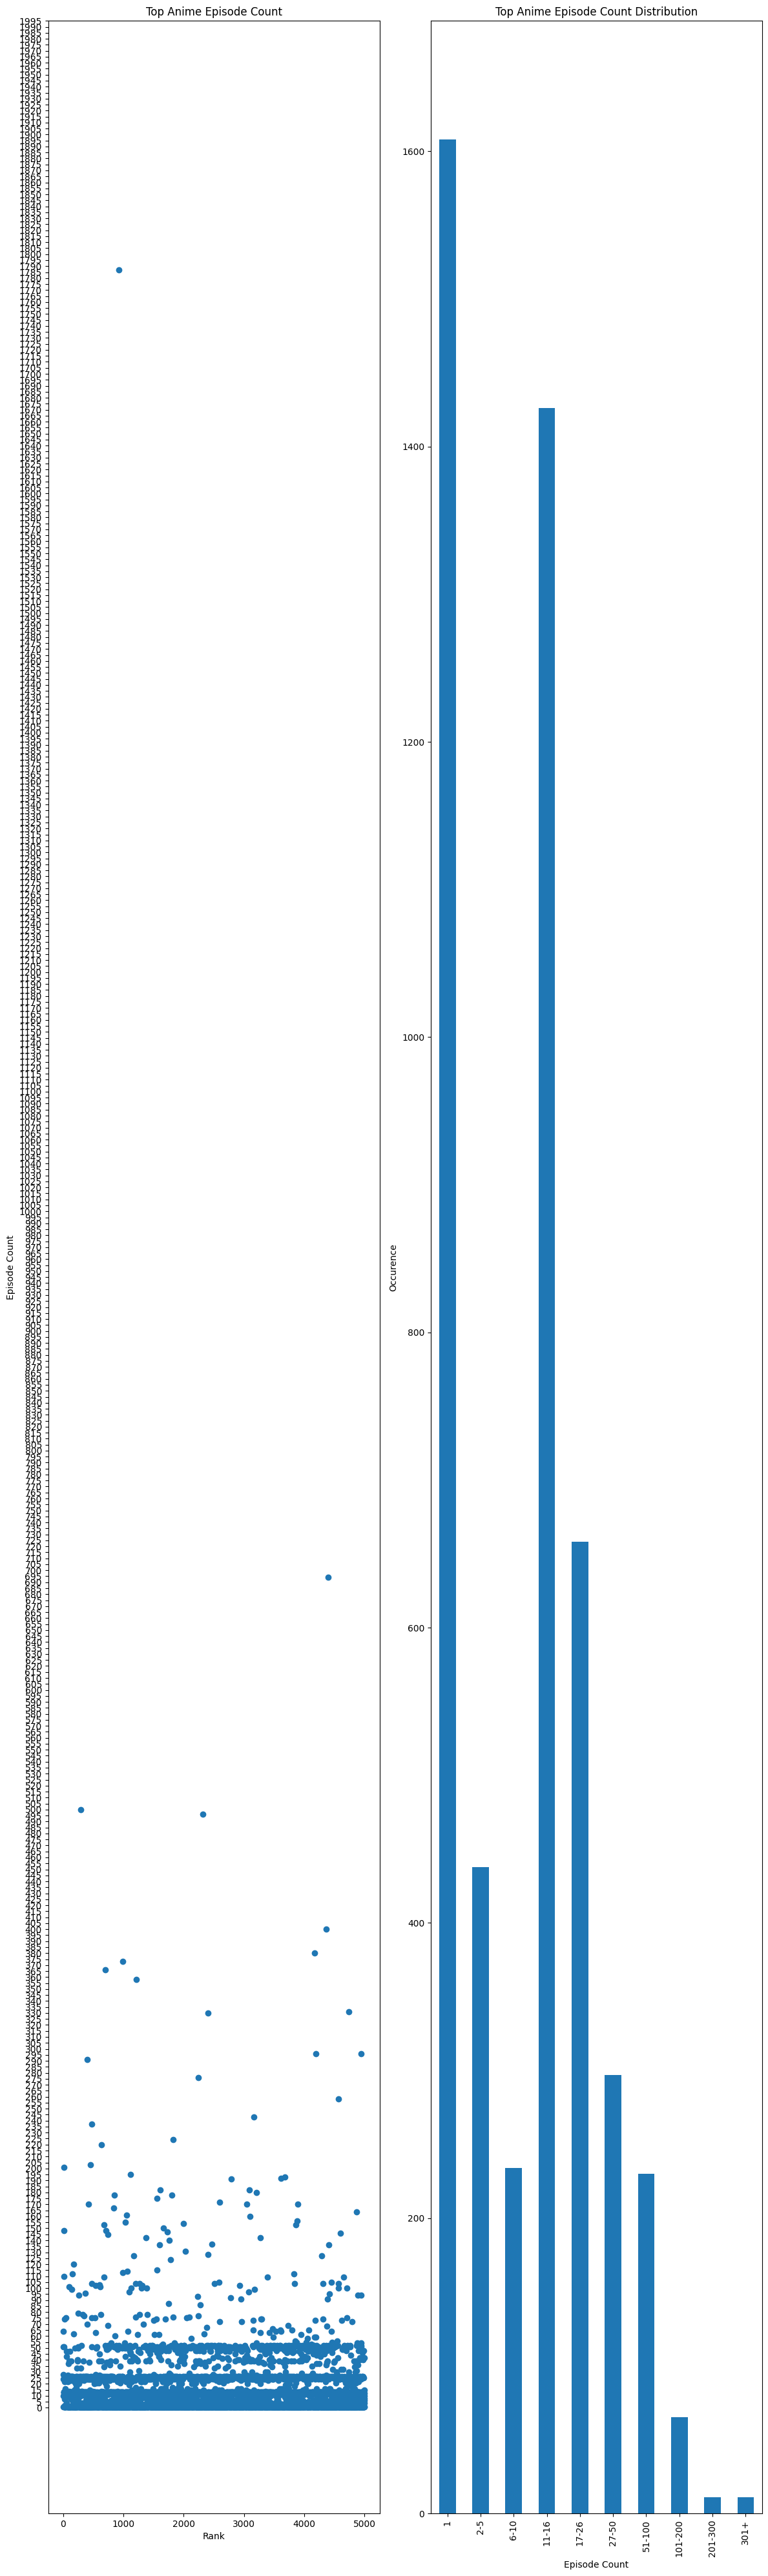

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(12, 40))


df = df[df['Type_count'] != "?"]

df = df.sort_values('Type_count')

axs[0].scatter(df['Rank'],df['Type_count'].astype(int))
axs[0].set_title('Top Anime Episode Count')
axs[0].set_xlabel('Rank')
axs[0].set_ylabel('Episode Count')
axs[0].set_yticks(range(0,2000,5))


bins = [0,1,5,10,16,26,50,100,200,300,float('inf')]
labels = ['1',"2-5","6-10","11-16","17-26","27-50","51-100","101-200","201-300","301+"]

flat_series = df['Type_count'].values.flatten()

numerical_series = pd.to_numeric(pd.Series(flat_series), errors='coerce')
numerical_series = numerical_series.dropna()

binned_series = pd.cut(numerical_series,bins=bins,labels=labels)

occurrences = binned_series.value_counts().sort_index()

occurrences.plot(kind='bar', ax=axs[1])

axs[1].set_title('Top Anime Episode Count Distribution')
axs[1].set_xlabel('Episode Count')
axs[1].set_ylabel('Occurence')

plt.tight_layout()

plt.show()

